In [211]:
import numpy as np
import pandas as pd
from scipy.stats.stats import pearsonr, spearmanr
from scipy.stats import linregress
import math
import matplotlib.pyplot as plt
%matplotlib inline

### Set up test framework

In [212]:
x = [7, 6, 8, 5, 9, 11, 14, 12]
y = [16, 12, 15, 13, 16, 22, 26, 23]

In [213]:
print "Pearson correlation coefficient: ", pearsonr(x,y)

Pearson correlation coefficient:  (0.96848328480381796, 7.6425835327808119e-05)


In [214]:
print "Spearman rank order: ", spearmanr(x,y)

Spearman rank order:  SpearmanrResult(correlation=0.93414848429234199, pvalue=0.00067910574523109694)


In [215]:
#Full regression 
linregress(x, y)

LinregressResult(slope=1.588235294117647, intercept=3.5808823529411775, rvalue=0.96848328480381796, pvalue=7.6425835327808132e-05, stderr=0.16675675189386308)

### Construct calculations
The equation for a regression line is as follows: Y = a + Bx.<br>

In [216]:
def get_mean(num_lst):
    return np.mean(num_lst)

def get_sd(num_lst, mean):
    total=0
    for num in num_lst:
        total+= (num-mean) ** 2
    variance = total / len(num_lst) * 1.0
    return math.sqrt(variance)

def pearson(x, y):
    total = 0
    total_x_sq = 0
    total_y_sq = 0
    for i, elem in enumerate(x):
        total += float(x[i] * y[i])
        total_x_sq += x[i] ** 2.0
        total_y_sq += y[i] ** 2.0
    numerator = (len(x) * total) - (sum(x) * sum(y))
    denominator = math.sqrt((len(x) * total_x_sq - (sum(x) ** 2)) * (len(x)* total_y_sq - (sum(y) ** 2)))
    return float(numerator / denominator)
                                                             
def get_slope(r, sd_x, sd_y):
    return r * (sd_y/sd_x) * 1.0

def get_intercept(mean_x, mean_y, slope):
    return mean_y - (slope * mean_x)
    

### Run linear regression model on test data

In [217]:
def linear_regression(x, y):
    
    mean_x = get_mean(x)
    mean_y = get_mean(y)

    r = pearson(x,y)

    sdx = get_sd(x, mean_x)
    sdy = get_sd(y, mean_y)

    slope = get_slope(r, sdx, sdy)

    intercept = get_intercept(mean_x, mean_y, slope)
    
    return slope, intercept

Confirm coefficients match the test output: 

In [218]:
slope, intercept = linear_regression(x, y)
print "Slope: ", slope, '\n', "Intercept: ", intercept

Slope:  1.58823529412 
Intercept:  3.58088235294


In [222]:
def predictions(x, slope, intercept):
    pred_lst = [slope * num + intercept for num in x]
    return pred_lst

In [223]:
y_hats = predictions(x, slope, intercept)

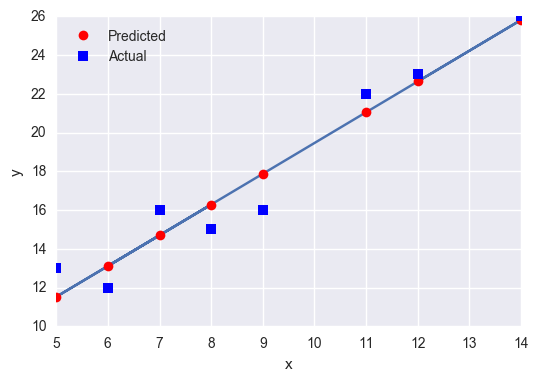

In [224]:
plt.plot(x, y_hats)
predicted, = plt.plot(x, y_hats, 'ro', label='Predicted')
actual, = plt.plot(x, y, 'bs', label='Actual')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(handles=[predicted, actual], loc=2)
plt.show()